# Principle Component Analysis In python

## Importing libraries

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

## Random Dataset

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

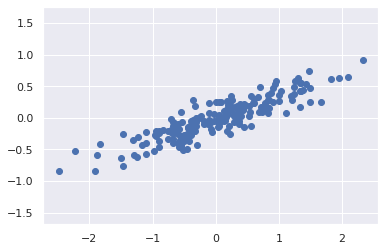

In [ ]:
rng = np.random.RandomState(1)
x = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [19]:
from sklearn.decomposition import PCA
pca =PCA(n_components = 2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [20]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [21]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


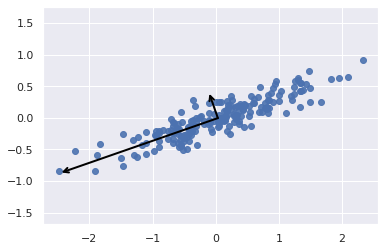

In [29]:
def draw_vector(v0, v1, ax=None):
  ax = ax or plt.gca()
  arrowprops=dict(arrowstyle='->',
                  linewidth=2,shrinkA=0, shrinkB=0,
                  edgecolor ='black')
  ax.annotate('', v1, v0, arrowprops=arrowprops)
plt.scatter(X[:, 0], X[:, 1], alpha=0.9)
for length, vector in zip(pca.explained_variance_, pca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');


In [30]:
pca = PCA(n_components = 1)
pca.fit(x)
x_pca = pca.transform(x)
print('Original Shape',x.shape)
print('Transformed Shape',x_pca.shape)

Original Shape (200, 2)
Transformed Shape (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

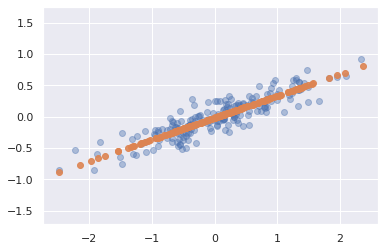

In [32]:
x_new  = pca.inverse_transform(x_pca)
plt.scatter(x[:,0],x[:,1],alpha = 0.4)
plt.scatter(x_new[:,0],x_new[:,1],alpha=0.9)
plt.axis('equal')

## PCA for Handwritten Digits 

In [34]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [35]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.data.shape)

(1797, 64)
(1797, 2)


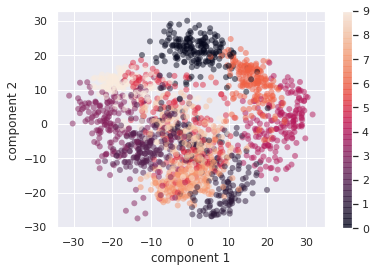

In [39]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
